## 카테고리 분포
베르누이 분포의 확장판이다. 

>- $\{0, 1\}$의 값이 나오는 확률 변수의 분포(ex. 동전던지기)가 베르누이 분포였다면,
- $\{1, 2, 3, 4, 5, 6\}$의 값이 나오는 확률 변수의 분포(ex. 주사위)가 **카테고리 분포**이다.

각 값을 클래스라고 하며, 주사위의 경우 $K=6$인 카테고리 분포이고, 
동전 던지기를 예로 든 베르누이의 경우 $K=2$인 카테고리 분포로 표현이 가능하다.

주의할 점은 다음과 같이 다차원 벡터 형태로 인코딩한 값을 확률 변수로 사용한다는 것이다.

$$ \begin{eqnarray}
x = 1  \;\; & \rightarrow & \;\; x = (1, 0, 0, 0, 0, 0) \\
x = 2  \;\; & \rightarrow & \;\; x = (0, 1, 0, 0, 0, 0) \\
x = 3  \;\; & \rightarrow & \;\; x = (0, 0, 1, 0, 0, 0) \\
x = 4  \;\; & \rightarrow & \;\; x = (0, 0, 0, 1, 0, 0) \\
x = 5  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 1, 0) \\
x = 6  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 0, 1) \\
\end{eqnarray}$$

*이러한 인코딩 방식을 One-Hot-Encoding  이라고 한다.*

따라서 출력되는 확률 변수의 값 $x$가 다음과 같이 벡터 값이 되는 것이다.

$$x = (x_1, x_2, x_3, x_4, x_5, x_6)$$

그러나, 이 벡터를 구성하는 원소 $x_1, x_2, x_3, x_4, x_5, x_6$에는 다음과 같은 제한 조건이 붙는다.

1. $x_i = \begin{cases} 0 \\ 1 \end{cases}$ - $x_k$가 0 혹은 1 만 가능

1. $\sum_{k=1}^K x_k = 1$ - 여러개의 $x_k$중 단 하나만 1



>1. 각각의 원소 값 $x_k$는 일종의 베르누이 확률 분포라고 볼 수 있다.
1. 따라서 각각 1이 나올 확률을 나타내는 모수 $\theta_k$를 가진다.
1. 전체 카테고리 분포의 모수는 다음과 같이 벡터로 나타낸다.

$$ \theta = (\theta_1, \cdots, \theta_K) $$


이 모수 벡터도 다음과 같이 제한 조건을 가진다.


1. $ 0 \leq \theta_i \leq 1 $ - 각각의 값이 나올 **확률**이기 때문에 당연하다.

1. $ \sum_{k=1}^{K} \theta_k = 1 $ - 다 더하면 1이 되는 것이 **확률**

카테고리 분포는 다음과 같이 표기한다.

$$\text{Cat}(x_1, x_2, \dots, x_K;\theta_1, \dots, \theta_K)$$ 

혹은 벡터를 사용하여 간단히 표기할 수 있다.

$$\text{Cat}(x;\theta)$$

함수의 경우 다음과 같다.

$$\text{Cat}(x;\theta) = 
\begin{cases}
\theta_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\theta_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\theta_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\theta_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}$$

물론 다음과 같이 간략하게 쓸 수 있다.

$$\text{Cat}(x;\theta) = \theta_1^{x_1} \theta_2^{x_2}  \cdots \theta_K^{x_K}  =  \prod_{k=1}^K \theta_k^{x_k}$$

### 모멘트
카테고리 분포의 기댓값과 분산

- 기댓값
$$ E[x_k] = \theta_k $$
- 분산
$$ Var[x_k] = \theta_k(1-\theta_k) $$

### SciPy 시뮬레이션
Numpy.random 서브 패키지의 multinomial 명령에서 `n`인수를 1로 설정하고 `pval`에 모수 벡터 $\theta$를 설정하면 1 부터 `len(pvals)`까지의 카테고리 분포를 따르는 데이터 샘플을 생성할 수 있다.

In [1]:
%matplotlib inline
theta = np.array([0, 0.05, 0.1, 0.2, 0.3, 0.35]) # theta 설정
X = np.random.multinomial(1, theta, size=20) #카테고리 생성

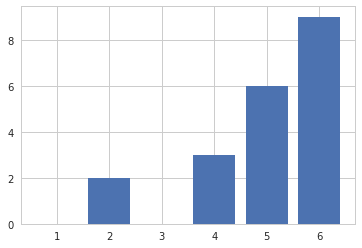

In [2]:
plt.bar(np.arange(1, 7), X.sum(axis=0))
plt.show()

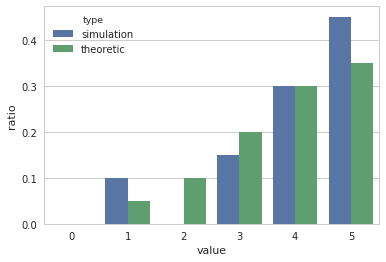

In [3]:
# 이론적 값과 시뮬레이션 값을 함께 보여주기 위해 데이터프레임 생성
df = pd.DataFrame({'theoretic':theta, 'simulation':X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ['value', 'type', 'ratio']
df.head()
sns.barplot(x='value', y='ratio', hue='type', data=df)
plt.show()

---

## 다항분포 (Multinomial distribution)

베르누이 시도를 여러번 하여 얻은 총 성공 횟수 합이 이항 분포를 이루는 것처럼, 카테고리 분포를 여러번 시도하여 얻은 각 원소의 성공횟수 값은 다항 분포를 이룬다.

다항 분포는 확률 모수가 $\theta = (\theta_1, \cdots, \theta_K)$인 독립적인 카테고리 시도를 $N$번 반복하여 $k$가 각각 $x_k$번 나올 확률, 즉 벡터 $x = (x_1, \cdots, x_K)$가 나올 확률 분포를 말한다.

$\text{Mu}(x;N,\theta)$와 같이 표기하며 다음과 같은 수식을 따른다.

$$\text{Mu}(x;N,\theta) = \binom N x  \prod_{k=1}^K \theta_k^{x_k} = \binom N {x_1, \cdots, x_K} \prod_{k=1}^K \theta_k^{x_k}$$



#### 다항분포의 모멘트

기댓값 

$$ E[x_k] = N\theta_k$$

분산

$$Var[x_k] = N\theta_k(1-\theta_k)$$

In [1]:
N = 30
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4])
X = np.random.multinomial(N, theta, size=100)
X[:5], len(X)

(array([[ 0,  0,  5,  4,  7, 14],
        [ 0,  0,  4,  6,  9, 11],
        [ 0,  0,  3,  7, 11,  9],
        [ 0,  0,  2,  4,  7, 17],
        [ 0,  0,  3,  6,  8, 13]]), 100)

In [22]:
a = sp.stats.multinomial(8, [0.3, 0.3, 0.4])
# print(a)
a.pmf([1, 3, 4])

0.058060799999999996

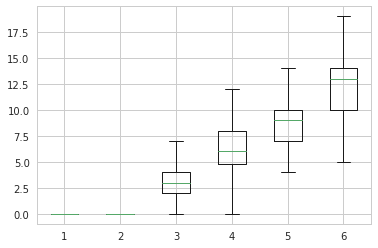

In [5]:
plt.boxplot(X)
plt.show()

In [6]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "binomial"]
df.head()

,trial,class,binomial
0,0,0,0
1,0,1,0
2,0,2,3
3,0,3,6
4,0,4,9


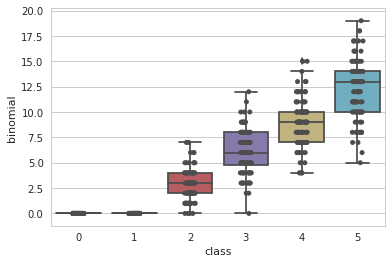

In [7]:
sns.boxplot(x="class", y="binomial", data=df)
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show()